# Outlier Detection of 4 Digit MWC 4 Players using Tournament Scores

In [1]:
import os

os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from utils.lof import LOF
from utils.metrics import nan_euclidean, elastic_nan_euclidean
from utils import get_table_players

In [4]:
from utils import Dataset

In [5]:
euclidean_regularized = elastic_nan_euclidean(1, 0.5, 0.5)
euclidean_ridge = elastic_nan_euclidean(1, 0.5, 0)
euclidean_lasso = elastic_nan_euclidean(1, 0, 0.5)

In [6]:
_4dm4_impute = Dataset('datasets/4dm3.db')

In [7]:
_4dm4_data = _4dm4_impute.select('scores', columns=['player_name', 'round', 'beatmap_type', 'beatmap_tag', 'score_logit'], where={
    'beatmap_type': ['LN', 'RC', 'HB'],
})

In [8]:
_4dm4_table = get_table_players(_4dm4_data)

In [9]:
standardized_4dm = pd.DataFrame(index=_4dm4_table.index)

In [10]:
for col in _4dm4_table.columns:
    mu = np.nanmean(_4dm4_table[col]); sigma = np.nanstd(_4dm4_table[col], ddof=1)
    standardized_4dm[col] = _4dm4_table[col].apply(lambda x: (x - mu) / sigma)

In [11]:
standardized_4dm.head()

,Q_RC_1,Q_RC_2,Q_LN_1,Q_HB_1,GS_RC_1,GS_RC_2,GS_RC_4,GS_LN_1,GS_LN_2,GS_HB_1,...,GF_RC_6,GF_RC_7,GF_LN_1,GF_LN_2,GF_LN_3,GF_HB_2,QF_LN_1,SF_HB_1,GF_HB_3,RO16_HB_2
Scep,2.112750,2.462536,0.218490,0.713758,2.240486,-1.315069,2.130158,0.531339,0.605757,2.026246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chiara,2.300720,1.480178,0.243935,1.123565,0.612993,2.363380,1.193031,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paturages,2.010649,NaN,NaN,NaN,1.017415,1.030878,1.458316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2zi,1.797106,NaN,NaN,NaN,1.688407,0.869808,0.464348,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZayyKen,1.298636,1.519942,0.790546,1.877259,2.346803,2.435073,1.507435,1.482213,NaN,2.449809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Implementing the Local Outlier Factor Model

We then declare the model with n_neighbors (k) = 5 and use our defined Elastic Euclidean Distance as a Metric

In [12]:
lof_elastic = LOF(5, euclidean_regularized)
lof_ridge = LOF(5, euclidean_ridge)
lof_lasso = LOF(5, euclidean_lasso)
lof_euclidean = LOF(5, nan_euclidean)

We then train and predict the Local Outlier Factor of each player, stored in `lof_values`

In [13]:
lof_euclid_values = lof_euclidean.fit_predict(standardized_4dm.values)
lof_ridge_values = lof_ridge.fit_predict(standardized_4dm.values)
lof_lasso_values = lof_lasso.fit_predict(standardized_4dm.values)
lof_elastic_values = lof_elastic.fit_predict(standardized_4dm.values)

Then we map those in a `DataFrame` in order to assign players their Local Outlier Factors

In [14]:
lof_4dm = pd.DataFrame(index=standardized_4dm.index)

lof_4dm['lof_euclid'] = lof_euclid_values
lof_4dm['lof_ridge'] = lof_ridge_values
lof_4dm['lof_lasso'] = lof_lasso_values
lof_4dm['lof_elastic'] = lof_elastic_values

In [15]:
lof_4dm.sort_values(by='lof_ridge', ascending=False).head(16)['lof_ridge']

Yuragi            19.158322
Scep              15.971805
diamondBIaze       8.530337
ZayyKen            8.509223
[-Leon-]           7.760614
2fast4you98        6.539114
Lenn               5.781118
-Deepdive-         5.359462
Zycrxd             5.264531
2zi                4.051843
FastTapper         3.984379
Chiara             3.973648
s_kolorowa         3.709374
NightNarumi        3.458794
palmEuEi           3.388741
KamaTheCrimson     3.237596
Name: lof_ridge, dtype: float64

In [16]:
lof_4dm.sort_values(by='lof_lasso', ascending=False).head(16)['lof_lasso']

Scep            8.447126
Yuragi          6.859503
[-Leon-]        6.470086
diamondBIaze    5.594109
ZayyKen         5.386482
Lenn            5.115319
2fast4you98     4.977885
Zycrxd          4.073037
palmEuEi        4.035253
s_kolorowa      3.420664
Chiara          3.409332
shokoha         3.258509
FastTapper      3.241646
Ju1nY11         3.217208
Silicosis       3.144054
2zi             3.094205
Name: lof_lasso, dtype: float64

In [17]:
lof_4dm.sort_values(by='lof_elastic', ascending=False).head(16)['lof_elastic']

Yuragi            13.046493
Scep              12.122661
diamondBIaze       7.013562
[-Leon-]           7.006151
ZayyKen            6.701084
2fast4you98        5.673555
Lenn               5.296673
Zycrxd             4.640061
-Deepdive-         4.150494
Chiara             3.680769
FastTapper         3.615011
2zi                3.601434
palmEuEi           3.591022
s_kolorowa         3.344116
KamaTheCrimson     3.114720
shokoha            3.101066
Name: lof_elastic, dtype: float64

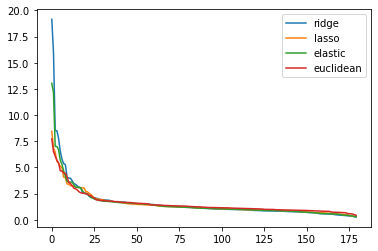

In [18]:
l_ridge = lof_4dm.sort_values(by='lof_ridge', ascending=False)['lof_ridge'].values
l_lasso = lof_4dm.sort_values(by='lof_lasso', ascending=False)['lof_lasso'].values
l_elastic = lof_4dm.sort_values(by='lof_elastic', ascending=False)['lof_elastic'].values
l_euclid = lof_4dm.sort_values(by='lof_euclid', ascending=False)['lof_euclid'].values
plt.plot(l_ridge, label="ridge")
plt.plot(l_lasso, label="lasso")
plt.plot(l_elastic, label="elastic")
plt.plot(l_euclid, label="euclidean")
plt.legend()
plt.show()

<AxesSubplot:>

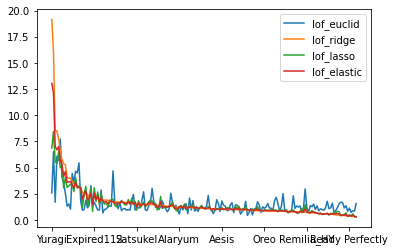

In [19]:
lof_4dm.sort_values(by='lof_ridge', ascending=False).plot()

<AxesSubplot:>

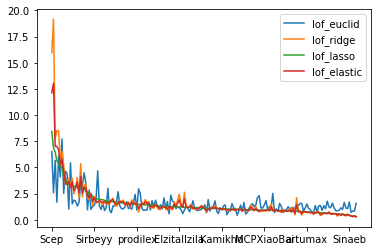

In [20]:
lof_4dm.sort_values(by='lof_lasso', ascending=False).plot()

<AxesSubplot:>

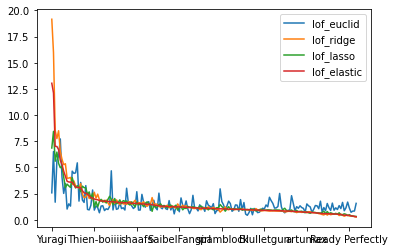

In [21]:
lof_4dm.sort_values(by='lof_elastic', ascending=False).plot()

<AxesSubplot:>

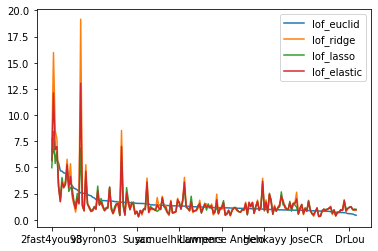

In [22]:
lof_4dm.sort_values(by='lof_euclid', ascending=False).plot()

In [23]:
log_euclid = np.log(lof_4dm['lof_euclid'])
log_ridge = np.log(lof_4dm['lof_ridge'])
log_lasso = np.log(lof_4dm['lof_lasso'])
log_elastic = np.log(lof_4dm['lof_elastic'])

(array([ 4., 11., 40., 57., 36., 11.,  8.,  4.,  6.,  3.]),
 array([-0.83872093, -0.55037418, -0.26202742,  0.02631933,  0.31466608,
         0.60301284,  0.89135959,  1.17970634,  1.4680531 ,  1.75639985,
         2.04474661]),
 <BarContainer object of 10 artists>)

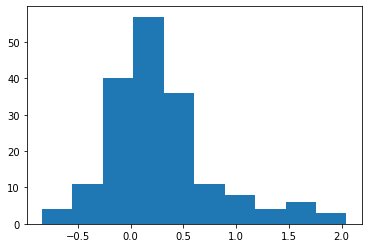

In [24]:
plt.hist(log_euclid)

(array([ 8., 15., 49., 55., 31.,  9.,  6.,  3.,  2.,  2.]),
 array([-1.28286641, -0.85930605, -0.43574569, -0.01218533,  0.41137503,
         0.83493539,  1.25849575,  1.68205611,  2.10561647,  2.52917683,
         2.95273719]),
 <BarContainer object of 10 artists>)

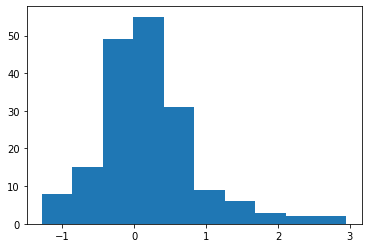

In [25]:
plt.hist(log_ridge)

(array([ 5., 10., 27., 56., 41., 17., 10.,  7.,  4.,  3.]),
 array([-1.14030345, -0.81289048, -0.48547751, -0.15806454,  0.16934843,
         0.49676141,  0.82417438,  1.15158735,  1.47900032,  1.8064133 ,
         2.13382627]),
 <BarContainer object of 10 artists>)

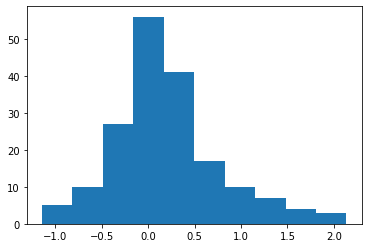

In [26]:
plt.hist(log_lasso)

(array([ 6., 17., 35., 58., 38.,  8., 10.,  3.,  3.,  2.]),
 array([-1.21637185, -0.83788273, -0.45939361, -0.08090449,  0.29758463,
         0.67607375,  1.05456287,  1.43305199,  1.81154111,  2.19003023,
         2.56851935]),
 <BarContainer object of 10 artists>)

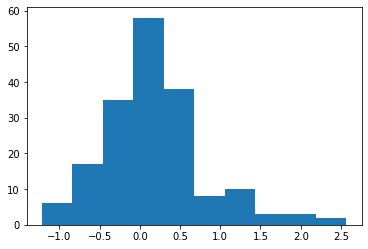

In [27]:
plt.hist(log_elastic)

In [28]:
from scipy.stats import shapiro

print("log euclid shapiro", shapiro(log_euclid))
# there is no turning back, I have committed a normal distribution
print("log ridge shapiro", shapiro(log_ridge))
print("log lasso shapiro", shapiro(log_lasso))
print("log elastic shapiro", shapiro(log_elastic))

log euclid shapiro ShapiroResult(statistic=0.9273519515991211, pvalue=7.83917926128197e-08)
log ridge shapiro ShapiroResult(statistic=0.9357234835624695, pvalue=3.448927543558966e-07)
log lasso shapiro ShapiroResult(statistic=0.954898476600647, pvalue=1.6376150597352535e-05)
log elastic shapiro ShapiroResult(statistic=0.9432051181793213, pvalue=1.427293454980827e-06)


In [29]:
right_ol_lof_ridge = np.mean(log_ridge) + 1.645 * np.std(log_ridge, ddof=1)
right_ol_lof_lasso = np.mean(log_lasso) + 1.645 * np.std(log_lasso, ddof=1)
right_ol_lof_elastic = np.mean(log_elastic) + 1.645 * np.std(log_elastic, ddof=1)

right_ol_lof_ridge, right_ol_lof_lasso, right_ol_lof_elastic

(1.3212216857005865, 1.162050414756787, 1.231184445838811)

In [30]:
lof_4dm['log_ridge'] = log_ridge
lof_4dm['log_lasso'] = log_lasso
lof_4dm['log_elastic'] = log_elastic

In [31]:
lof_4dm[['log_ridge']][lof_4dm['log_ridge'] > right_ol_lof_ridge].sort_values(by='log_ridge', ascending=False)

,log_ridge
Yuragi,2.952737
Scep,2.770825
diamondBIaze,2.143629
ZayyKen,2.141151
[-Leon-],2.049061
2fast4you98,1.877802
Lenn,1.754597
-Deepdive-,1.678864
Zycrxd,1.660992
2zi,1.399172


In [32]:
lof_4dm[['log_lasso']][lof_4dm['log_lasso'] > right_ol_lof_lasso].sort_values(by='log_lasso', ascending=False)

,log_lasso
Scep,2.133826
Yuragi,1.925635
[-Leon-],1.867189
diamondBIaze,1.721714
ZayyKen,1.683893
Lenn,1.632240
2fast4you98,1.605005
Zycrxd,1.404389
palmEuEi,1.395069
s_kolorowa,1.229835


In [33]:
lof_4dm[['log_elastic']][lof_4dm['log_elastic'] > right_ol_lof_elastic].sort_values(by='log_elastic', ascending=False)

,log_elastic
Yuragi,2.568519
Scep,2.495077
diamondBIaze,1.947846
[-Leon-],1.946788
ZayyKen,1.902269
2fast4you98,1.735816
Lenn,1.667079
Zycrxd,1.534727
-Deepdive-,1.423227
Chiara,1.303122
